In [ ]:
import pandas as pd


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import optuna
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, classification_report
optuna.logging.set_verbosity(optuna.logging.ERROR)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
import random
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r'test_data_attrition_scaling.csv')
# data = pd.read_csv('/content/test_data_attrition_scaling.csv')
X = data.drop('Attrition', axis=1)
y = data['Attrition']


In [8]:
path = 'C:/Users/HP/Pictures/New folder/src/models/'

In [9]:
models = ['LogisticRegression_model.pkl',
         'random_forest_model.pkl',
         'svc_model.pkl',
         'xgboost_model.pkl',
         'lightgbm_model.pkl',
         'catboost_model.pkl'
         ]
dict_model = {'LogisticRegression_model.pkl':"Logistic Regression",
         'random_forest_model.pkl':"Random Forest",
         'svc_model.pkl':"Support Vector Machine",
         'xgboost_model.pkl':'XGBoost',
         'lightgbm_model.pkl':"LightGBM",
         'catboost_model.pkl':"CatBoost"
}

Validation Logistic Regression model

Final evaluation on test set:
F1 Score: 0.4043
Recall: 0.4872
Precision: 0.3455
ROC AUC Score: 0.7432

Detailed Classification Report:
              precision    recall  f1-score   support

           0      0.916     0.859     0.887       255
           1      0.345     0.487     0.404        39

    accuracy                          0.810       294
   macro avg      0.631     0.673     0.645       294
weighted avg      0.841     0.810     0.823       294



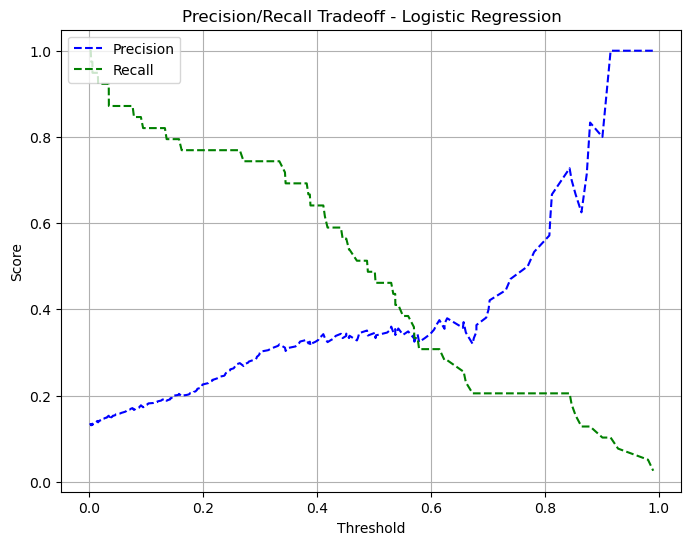

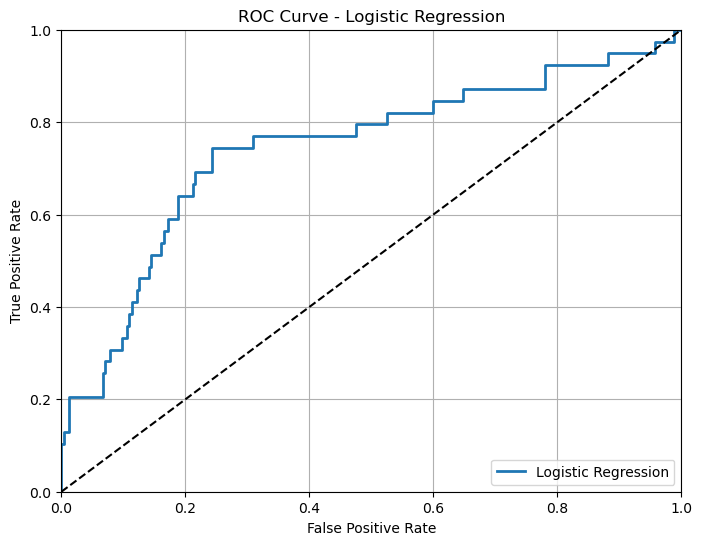

Validation Random Forest model

Final evaluation on test set:
F1 Score: 0.3514
Recall: 0.3333
Precision: 0.3714
ROC AUC Score: 0.7324

Detailed Classification Report:
              precision    recall  f1-score   support

           0      0.900     0.914     0.907       255
           1      0.371     0.333     0.351        39

    accuracy                          0.837       294
   macro avg      0.636     0.624     0.629       294
weighted avg      0.830     0.837     0.833       294



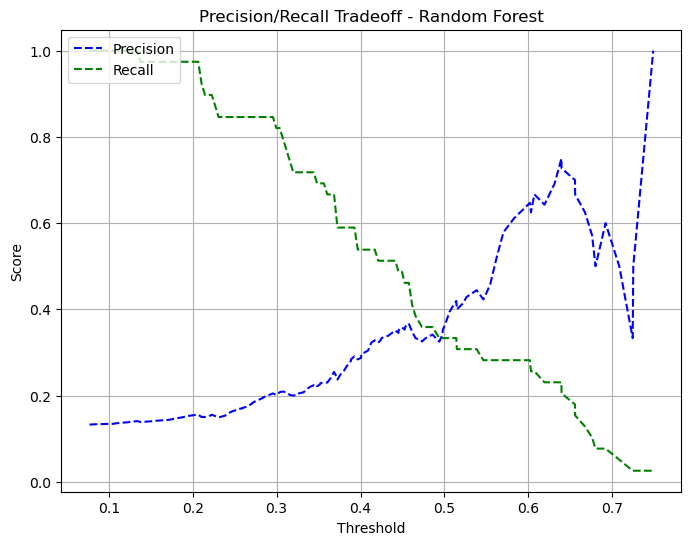

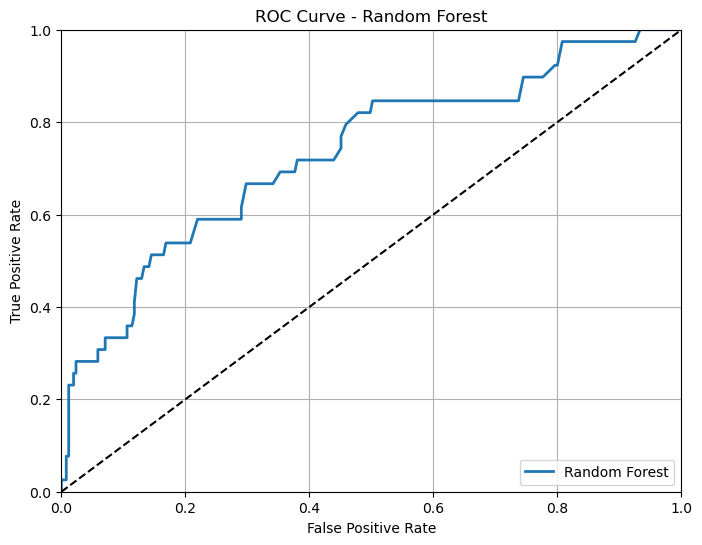

Validation Support Vector Machine model

Final evaluation on test set:
F1 Score: 0.2545
Recall: 0.1795
Precision: 0.4375
ROC AUC Score: 0.7169

Detailed Classification Report:
              precision    recall  f1-score   support

           0      0.885     0.965     0.923       255
           1      0.438     0.179     0.255        39

    accuracy                          0.861       294
   macro avg      0.661     0.572     0.589       294
weighted avg      0.826     0.861     0.834       294



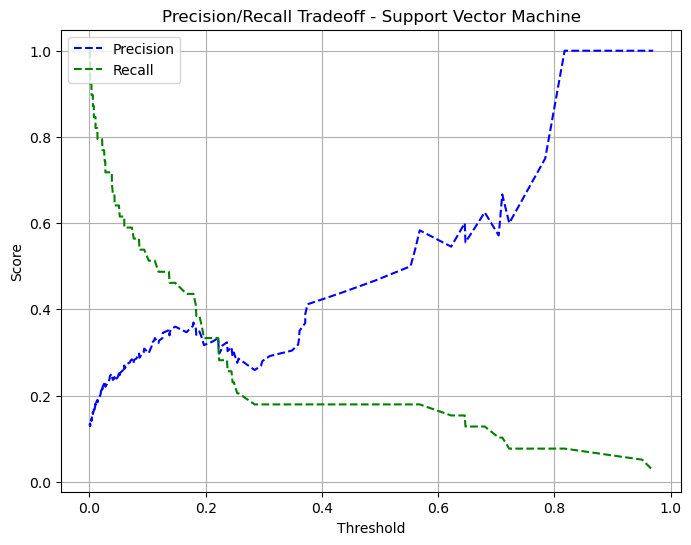

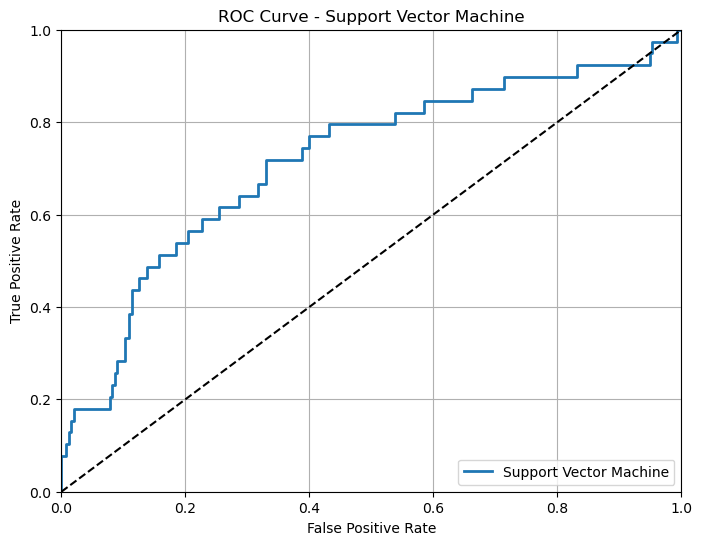

Validation XGBoost model

Final evaluation on test set:
F1 Score: 0.3333
Recall: 0.6154
Precision: 0.2286
ROC AUC Score: 0.7192

Detailed Classification Report:
              precision    recall  f1-score   support

           0      0.921     0.682     0.784       255
           1      0.229     0.615     0.333        39

    accuracy                          0.673       294
   macro avg      0.575     0.649     0.559       294
weighted avg      0.829     0.673     0.724       294



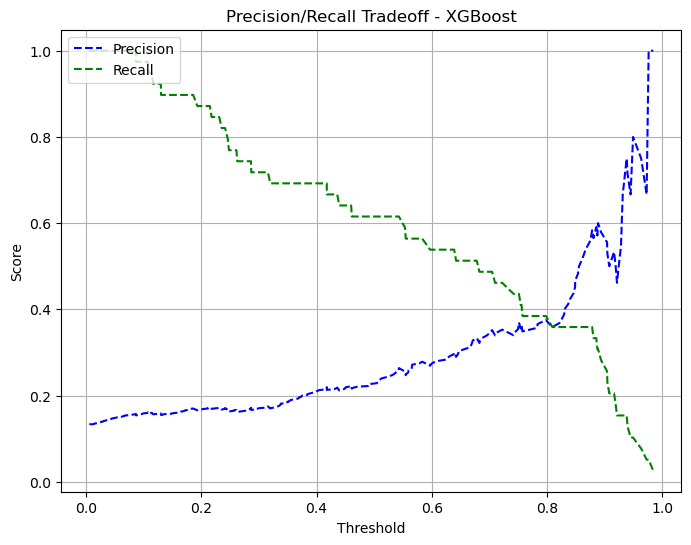

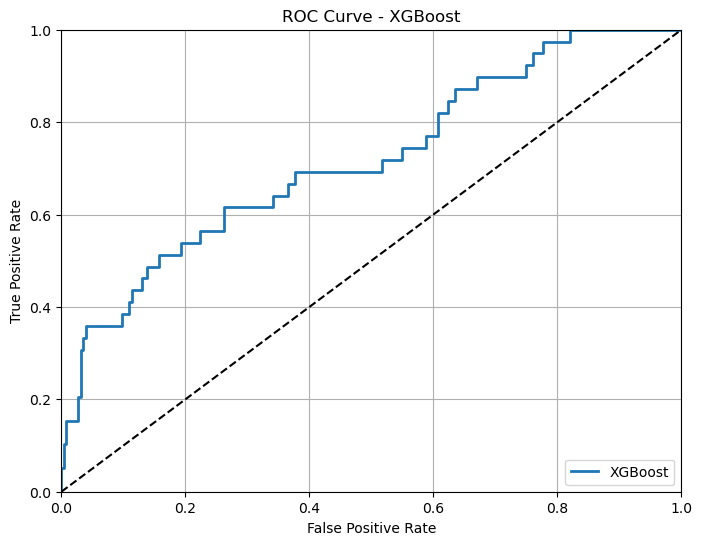

Validation LightGBM model

Final evaluation on test set:
F1 Score: 0.3509
Recall: 0.5128
Precision: 0.2667
ROC AUC Score: 0.7067

Detailed Classification Report:
              precision    recall  f1-score   support

           0      0.913     0.784     0.844       255
           1      0.267     0.513     0.351        39

    accuracy                          0.748       294
   macro avg      0.590     0.649     0.597       294
weighted avg      0.827     0.748     0.778       294



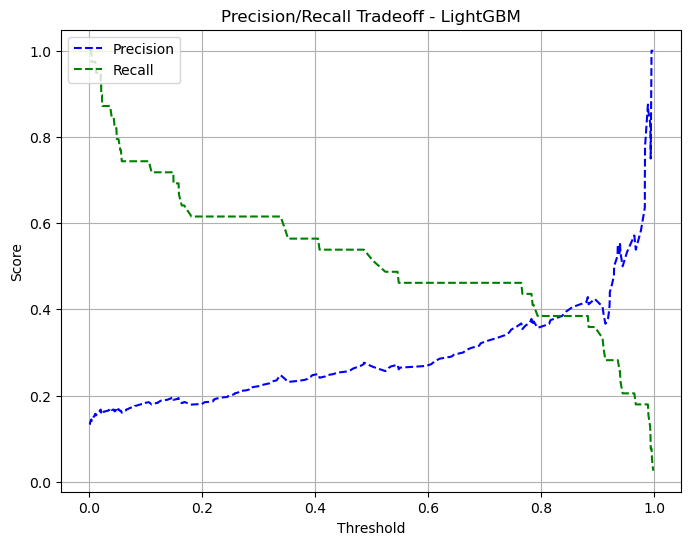

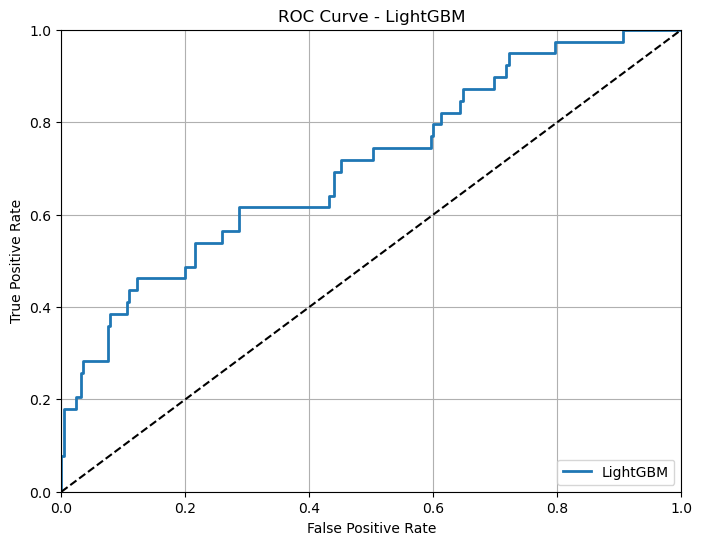

Validation CatBoost model

Final evaluation on test set:
F1 Score: 0.3853
Recall: 0.5385
Precision: 0.3000
ROC AUC Score: 0.7191

Detailed Classification Report:
              precision    recall  f1-score   support

           0      0.920     0.808     0.860       255
           1      0.300     0.538     0.385        39

    accuracy                          0.772       294
   macro avg      0.610     0.673     0.623       294
weighted avg      0.837     0.772     0.797       294



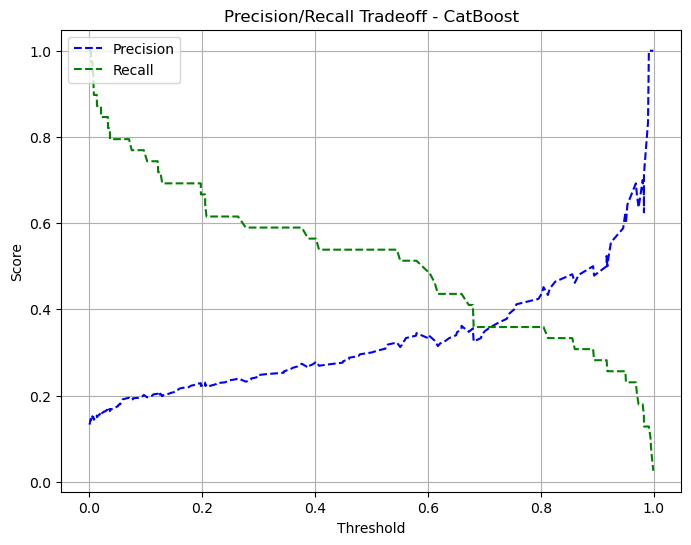

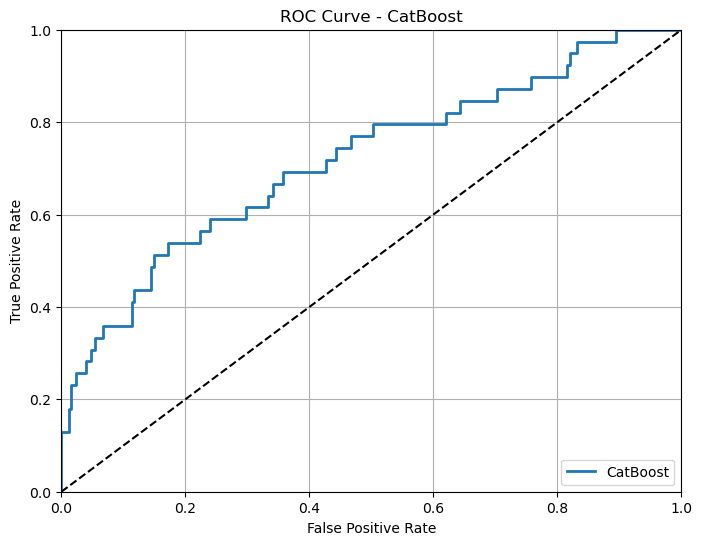

In [10]:
for m in models:
    print(f"Validation {dict_model[m]} model")
    with open(path + m, 'rb') as f:
        model = pickle.load(f)
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    print("\nFinal evaluation on test set:")
    print(f"F1 Score: {f1_score(y, y_pred):.4f}")
    print(f"Recall: {recall_score(y, y_pred):.4f}")
    print(f"Precision: {precision_score(y, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y, y_pred_proba):.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(y, y_pred, digits=3))
    precisions, recalls, thresholds = precision_recall_curve(y, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend(loc="upper left")
    plt.title(f"Precision/Recall Tradeoff - {dict_model[m]}")
    plt.grid(True)
    plt.show()
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=f"{dict_model[m]}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dict_model[m]}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()